# Setup

## Import modules

In [58]:
import sys

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Import global variables and plotting functions

In [59]:
sys.path.insert(0, '..')

# global vars
from util_scripts.plotting_fcts_and_vars import years, growth_boroughs, boroughs, west_boroughs, columns, types

# plotting per borrough
from util_scripts.plotting_fcts_and_vars import plot_boroughs, plot_all_boroughs, plot_all_boroughs_earlier, plot_boroughs_earlier

# plotting stations data
from util_scripts.plotting_fcts_and_vars import plot_stations, plot_stations_changes

# plotting global vars
from util_scripts.plotting_fcts_and_vars import FIGSIZE, YEAR_XLABEL, PLOTS_DIR, GROWTH_MULTIPLIER, POINT_CHANGE

sys.path.insert(0, './notebooks')

# Number of pubs by borough

In [60]:
# load
pubs_units = pd.read_excel("../data/pubs-borough-msoa.xls", sheet_name="Pubs units", skiprows=4, names=columns)

# remove missing values
pubs_units.dropna(inplace=True)
pubs_units.head()

,Area code,Area name,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,E12000007,London,4835.0,4875.0,4530.0,4455.0,4445.0,4335.0,4295.0,4210.0,4025.0,3890.0,3770.0,3770.0,3665.0,3615.0,3675.0,3615.0,3530.0
1,E09000001,City of London,200.0,195.0,180.0,180.0,200.0,185.0,200.0,195.0,185.0,190.0,175.0,165.0,155.0,160.0,150.0,150.0,160.0
2,E09000002,Barking and Dagenham,45.0,40.0,45.0,40.0,40.0,40.0,30.0,30.0,25.0,25.0,25.0,30.0,20.0,20.0,25.0,20.0,20.0
3,E09000003,Barnet,135.0,135.0,130.0,120.0,125.0,120.0,115.0,120.0,110.0,95.0,95.0,95.0,85.0,90.0,95.0,100.0,80.0
4,E09000004,Bexley,95.0,95.0,95.0,100.0,105.0,105.0,105.0,105.0,90.0,95.0,95.0,95.0,95.0,85.0,90.0,90.0,95.0


## Absolute value of growth boroughs

In [61]:
pubs_units_boroughs = pubs_units[pubs_units['Area name'].isin(growth_boroughs)]
pubs_units_boroughs.head()
hackney_pubs_units = pubs_units_boroughs[pubs_units_boroughs['Area name'] == 'Hackney']
hackney_pubs_units.head()


,Area code,Area name,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
12,E09000012,Hackney,155.0,155.0,135.0,135.0,135.0,130.0,125.0,130.0,125.0,120.0,125.0,135.0,145.0,150.0,155.0,160.0,175.0


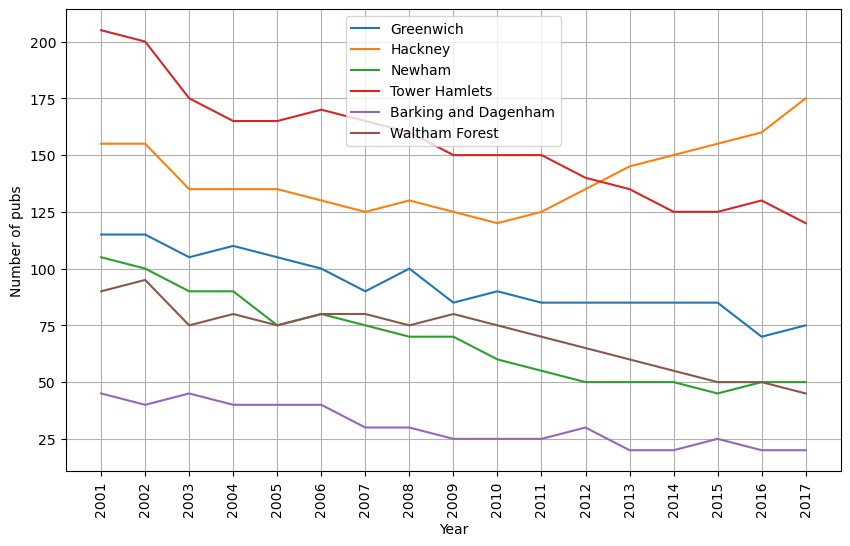

In [62]:
plot_boroughs(pubs_units_boroughs)
plt.ylabel('Number of pubs')

plt.savefig(f'{PLOTS_DIR}/pubs_units_values.png', bbox_inches='tight')
plt.show()

**Observations:**

## Changes (baseline 2005) 

In [63]:
multipliers_2005 = pubs_units[years].div(pubs_units["2005"], axis=0)
multipliers_2005 = pd.concat([pubs_units.iloc[:, :2], multipliers_2005], axis=1)
multipliers_2005.head()
hackney_multipliers_2005 = multipliers_2005[multipliers_2005['Area name'] == 'Hackney']
hackney_multipliers_2005.head()

,Area code,Area name,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
12,E09000012,Hackney,1.148148,1.148148,1.0,1.0,1.0,0.962963,0.925926,0.962963,0.925926,0.888889,0.925926,1.0,1.074074,1.111111,1.148148,1.185185,1.296296


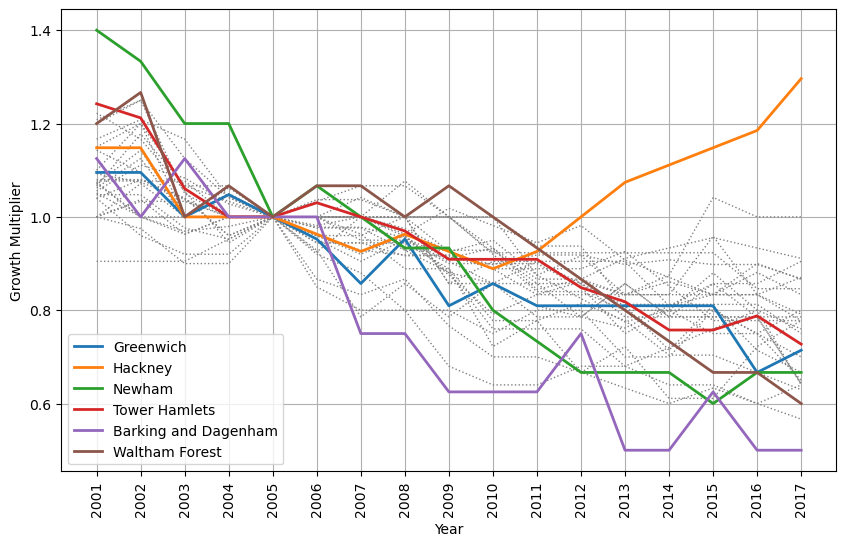

In [64]:
plot_all_boroughs(multipliers_2005)
plt.ylabel(GROWTH_MULTIPLIER)

plt.savefig(f'{PLOTS_DIR}/pubs_units_multiplier_2005')
plt.show()

## Changes (baseline 2011)

In [65]:
multipliers_2011 = pubs_units[years].div(pubs_units["2011"], axis=0)
multipliers_2011 = pd.concat([pubs_units.iloc[:, :2], multipliers_2011], axis=1)
multipliers_2011.head()
hackney_multipliers_2011 = multipliers_2011[multipliers_2011['Area name'] == 'Hackney']
hackney_multipliers_2011.head()

,Area code,Area name,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
12,E09000012,Hackney,1.24,1.24,1.08,1.08,1.08,1.04,1.0,1.04,1.0,0.96,1.0,1.08,1.16,1.2,1.24,1.28,1.4


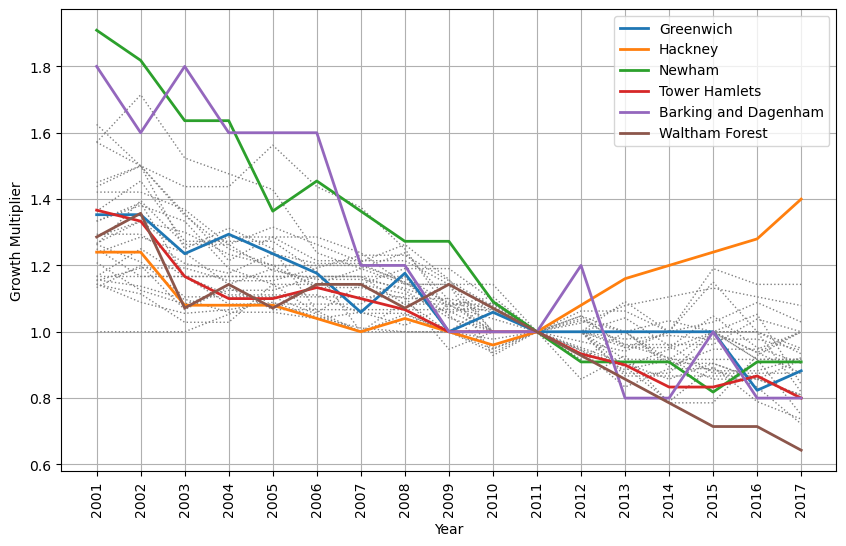

In [66]:
plot_all_boroughs(multipliers_2011)
plt.ylabel(GROWTH_MULTIPLIER)

plt.savefig(f'{PLOTS_DIR}/pubs_units_multiplier_2011')
plt.show()

# Number of pub employees by borough

In [67]:
pubs_employees = pd.read_excel("../data/pubs-borough-msoa.xls", sheet_name="Pubs employment", skiprows=4, names=columns)
pubs_employees_boroughs = pubs_employees[pubs_employees['Area name'].isin(growth_boroughs)]

pubs_employees_boroughs.head()
hackney_pubs_employees = pubs_employees_boroughs[pubs_employees_boroughs['Area name'] == 'Hackney']

## Aboslute value of growth boroughs

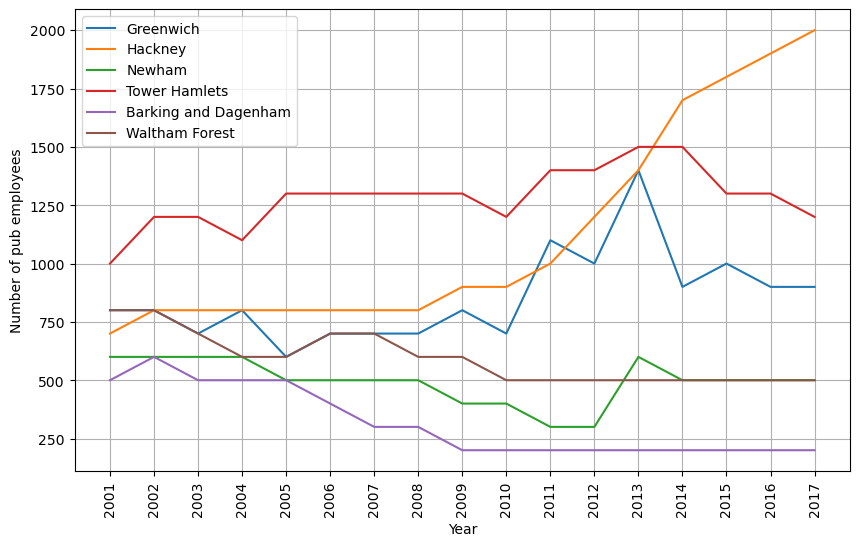

In [68]:
plot_boroughs(pubs_employees_boroughs)
plt.ylabel('Number of pub employees')

plt.savefig(f'{PLOTS_DIR}/pubs_employees_values.png', bbox_inches='tight')
plt.show()

## Changes (baseline 2005)

In [69]:
multipliers_emp_2005 = pubs_employees[years].div(pubs_employees["2005"], axis=0)
multipliers_emp_2005 = pd.concat([pubs_employees.iloc[:, :2], multipliers_emp_2005], axis=1)
multipliers_emp_2005.head()
hackney_multipliers_emp_2005 = multipliers_emp_2005[multipliers_emp_2005['Area name'] == 'Hackney']

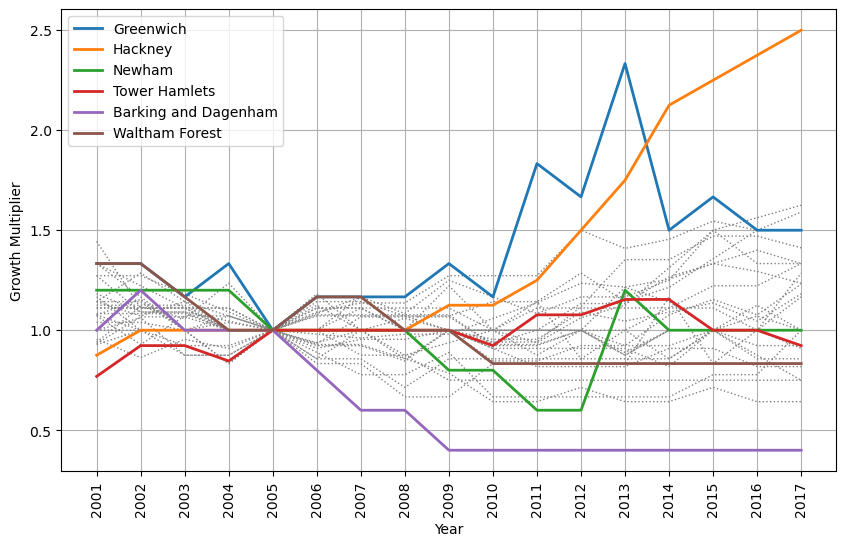

In [70]:
plot_all_boroughs(multipliers_emp_2005)
plt.ylabel(GROWTH_MULTIPLIER)

plt.savefig(f'{PLOTS_DIR}/pubs_employees_multiplier_2005')
plt.show()

## Changes (baseline 2011)

In [71]:
multipliers_emp_2011 = pubs_employees[years].div(pubs_employees["2011"], axis=0)
multipliers_emp_2011 = pd.concat([pubs_employees.iloc[:, :2], multipliers_emp_2011], axis=1)
multipliers_emp_2011.head()
hackney_multipliers_emp_2011 = multipliers_emp_2011[multipliers_emp_2011['Area name'] == 'Hackney']
newham_multipliers_emp_2011 = multipliers_emp_2011[multipliers_emp_2011['Area name'] == 'Newham']

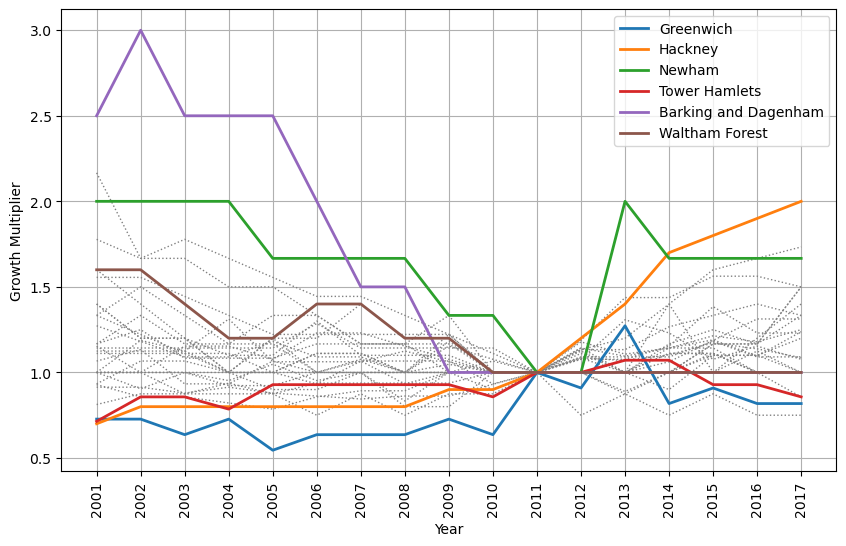

In [72]:
plot_all_boroughs(multipliers_emp_2011)
plt.ylabel(GROWTH_MULTIPLIER)

plt.savefig(f'{PLOTS_DIR}/pubs_employees_multiplier_2011')
plt.show()

# Number of small public houses and bars by borough


In [73]:
small_pubs = pd.read_excel("../data/pubs-borough-msoa.xls", sheet_name="Small Pubs units", skiprows=4, names=columns)
small_pubs_boroughs = small_pubs[small_pubs['Area name'].isin(growth_boroughs)]

small_pubs_boroughs.head()
hackney_small_pubs = small_pubs_boroughs[small_pubs_boroughs['Area name'] == 'Hackney']

## Absolute value of growth boroughs

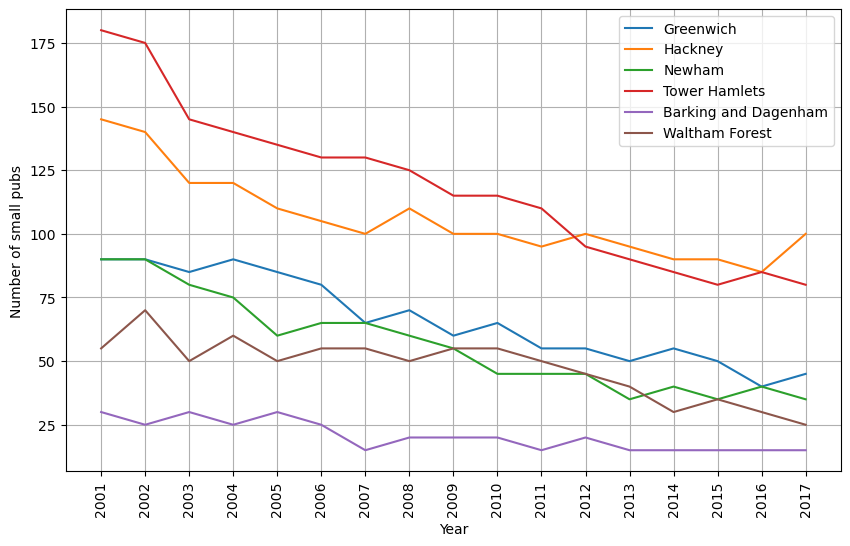

In [74]:
plot_boroughs(small_pubs_boroughs)
plt.ylabel('Number of small pubs')

plt.savefig(f'{PLOTS_DIR}/small_pubs_units_values.png', bbox_inches='tight')
plt.show()

## Changes (baseline 2005)

In [75]:
multipliers_sm_2005 = small_pubs[years].div(small_pubs["2005"], axis=0)
multipliers_sm_2005 = pd.concat([small_pubs.iloc[:, :2], multipliers_sm_2005], axis=1)
multipliers_sm_2005.head()
hackney_multipliers_sm_2005 = multipliers_sm_2005[multipliers_sm_2005['Area name'] == 'Hackney']

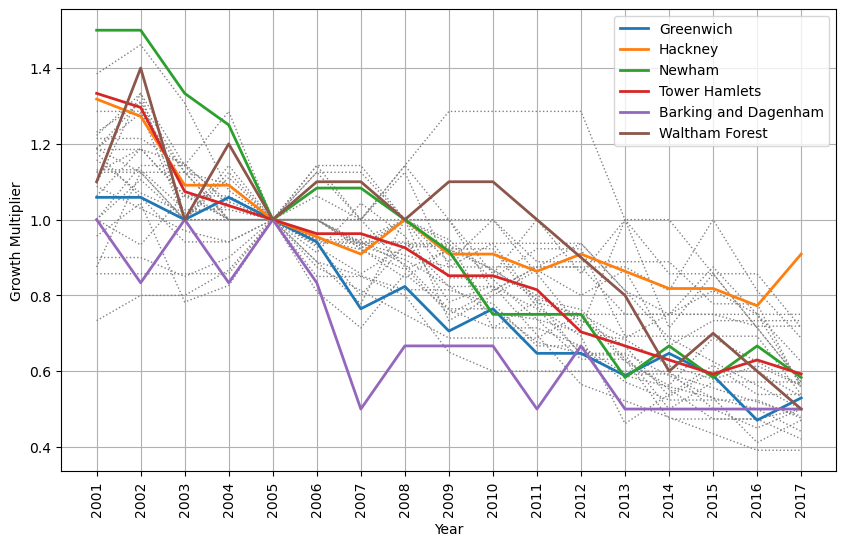

In [76]:
plot_all_boroughs(multipliers_sm_2005)
plt.ylabel(GROWTH_MULTIPLIER)

plt.savefig(f'{PLOTS_DIR}/small_pubs_units_multiplier_2005')
plt.show()

## Changes (baseline 2011)

In [77]:
multipliers_sm_2011 = small_pubs[years].div(small_pubs["2011"], axis=0)
multipliers_sm_2011 = pd.concat([small_pubs.iloc[:, :2], multipliers_sm_2011], axis=1)
multipliers_sm_2011.head()
hackney_multipliers_sm_2011 = multipliers_sm_2011[multipliers_sm_2011['Area name'] == 'Hackney']

In [78]:
multipliers_sm_2011


,Area code,Area name,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,E12000007,London,1.461207,1.493534,1.344828,1.327586,1.299569,1.252155,1.204741,1.185345,1.101293,1.051724,1.0,0.954741,0.872845,0.808190,0.801724,0.762931,0.724138
1,E09000001,City of London,1.375000,1.500000,1.125000,1.187500,1.437500,1.312500,1.500000,1.375000,1.125000,1.187500,1.0,0.812500,0.750000,0.687500,0.625000,0.562500,0.562500
2,E09000002,Barking and Dagenham,2.000000,1.666667,2.000000,1.666667,2.000000,1.666667,1.000000,1.333333,1.333333,1.333333,1.0,1.333333,1.000000,1.000000,1.000000,1.000000,1.000000
3,E09000003,Barnet,1.583333,1.500000,1.500000,1.333333,1.333333,1.333333,1.333333,1.333333,1.250000,1.000000,1.0,1.000000,0.916667,1.000000,1.000000,1.000000,0.750000
4,E09000004,Bexley,0.846154,0.923077,0.923077,1.000000,1.153846,1.153846,1.076923,1.153846,0.846154,0.923077,1.0,0.923077,1.000000,0.769231,0.846154,0.846154,0.846154
5,E09000005,Brent,1.200000,1.266667,1.133333,1.066667,1.066667,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000,0.866667,0.800000,0.866667,0.800000,0.666667
6,E09000006,Bromley,1.250000,1.166667,1.333333,1.250000,1.250000,1.166667,1.000000,1.166667,1.166667,1.083333,1.0,0.916667,0.833333,0.666667,0.750000,0.750000,0.666667
7,E09000007,Camden,1.433333,1.433333,1.300000,1.300000,1.266667,1.200000,1.166667,1.100000,1.166667,1.100000,1.0,0.966667,0.800000,0.700000,0.600000,0.600000,0.633333
8,E09000008,Croydon,1.533333,1.866667,1.600000,1.466667,1.400000,1.133333,1.000000,1.200000,1.066667,1.000000,1.0,0.933333,0.800000,0.733333,0.733333,0.733333,0.666667
9,E09000009,Ealing,1.357143,1.500000,1.285714,1.142857,1.142857,1.214286,1.142857,1.000000,0.857143,0.928571,1.0,1.000000,1.000000,0.928571,1.142857,0.928571,0.785714


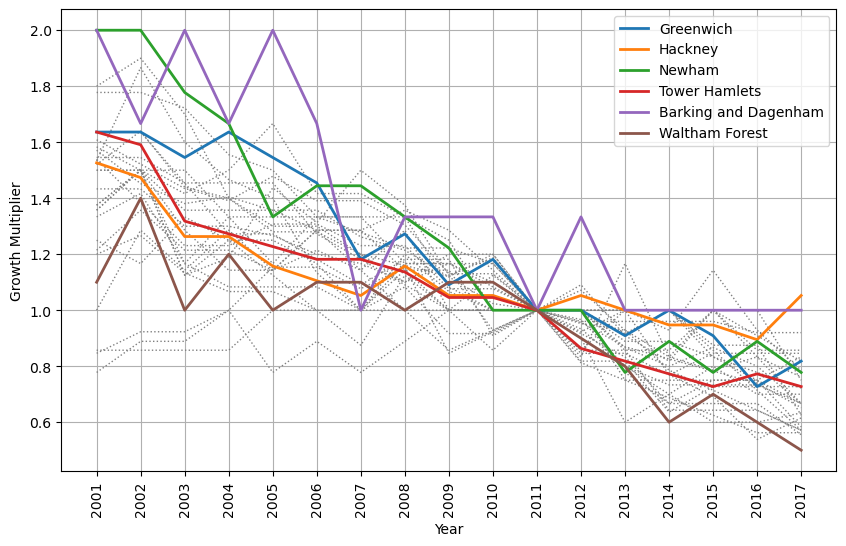

In [79]:
plot_all_boroughs(multipliers_sm_2011)
plt.ylabel(GROWTH_MULTIPLIER)

plt.savefig(f'{PLOTS_DIR}/small_pubs_units_multiplier_2011')
plt.show()

# Number of employees of small pubs by borough

In [80]:
small_pubs_employees = pd.read_excel("../data/pubs-borough-msoa.xls", sheet_name="Small Pubs employment", skiprows=4, names=columns)

small_pubs_employees.dropna(inplace=True)
small_pubs_employees = small_pubs_employees[~small_pubs_employees['Area name'].isin(['Barking and Dagenham','Merton']) ]

small_pubs_employees_boroughs = small_pubs_employees[small_pubs_employees['Area name'].isin(growth_boroughs)]
small_pubs_employees_boroughs.head()
hackney_small_pubs_employees = small_pubs_employees_boroughs[small_pubs_employees_boroughs['Area name'] == 'Hackney']

## Absolute value of growth boroughs

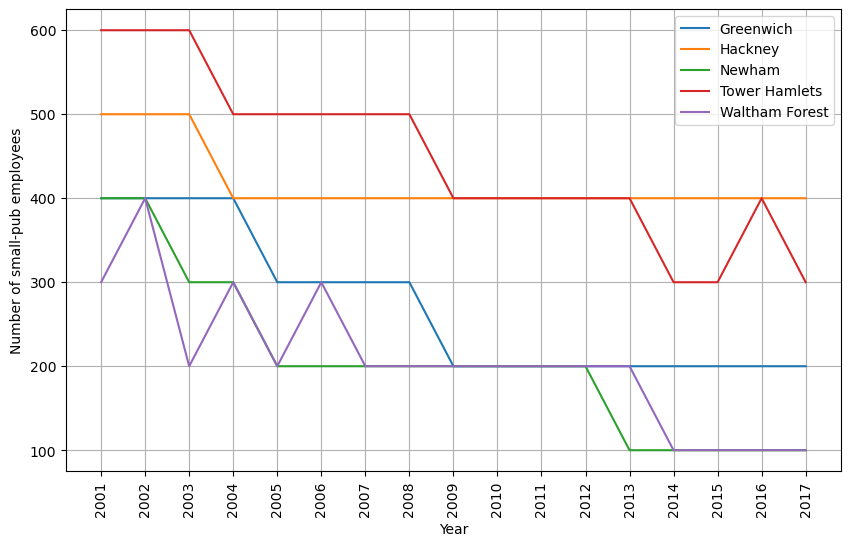

In [81]:
plot_boroughs(small_pubs_employees_boroughs)
plt.ylabel('Number of small-pub employees')

plt.savefig(f'{PLOTS_DIR}/small_pubs_employees_values.png', bbox_inches='tight')
plt.show()


## Changes (baseline 2005)

In [82]:
multipliers_sm_emp_2005 = small_pubs_employees[years].div(small_pubs_employees["2005"], axis=0)
multipliers_sm_emp_2005 = pd.concat([small_pubs_employees.iloc[:, :2], multipliers_sm_emp_2005], axis=1)
multipliers_sm_emp_2005.head()
hackney_multipliers_sm_emp_2005 = multipliers_sm_emp_2005[multipliers_sm_emp_2005['Area name'] == 'Hackney']

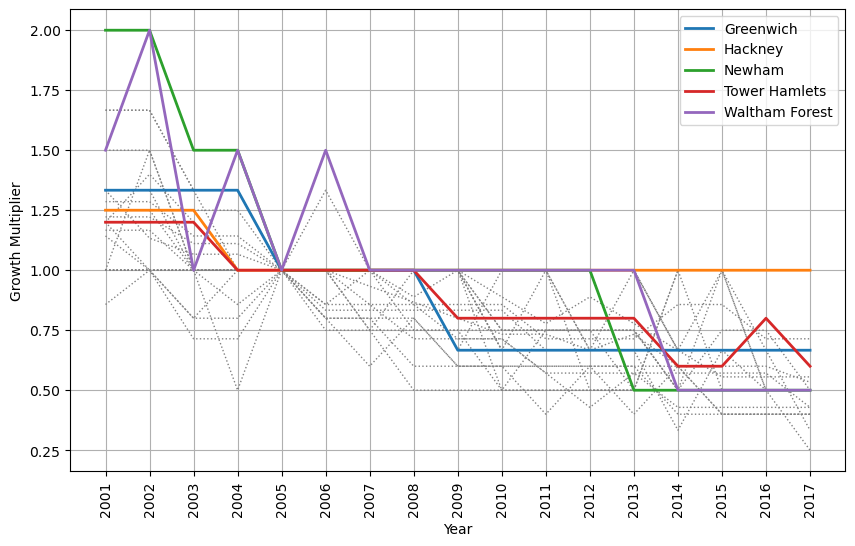

In [83]:
plot_all_boroughs(multipliers_sm_emp_2005)
plt.ylabel(GROWTH_MULTIPLIER)

plt.savefig(f'{PLOTS_DIR}/small_pubs_employees_multiplier_2005')
plt.show()

## Changes (baseline 2011)

In [84]:
multipliers_sm_emp_2011 = small_pubs_employees[years].div(small_pubs_employees["2011"], axis=0)
multipliers_sm_emp_2011 = pd.concat([small_pubs_employees.iloc[:, :2], multipliers_sm_emp_2011], axis=1)
multipliers_sm_emp_2011.head()
hackney_multipliers_sm_emp_2011 = multipliers_sm_emp_2011[multipliers_sm_emp_2011['Area name'] == 'Hackney']

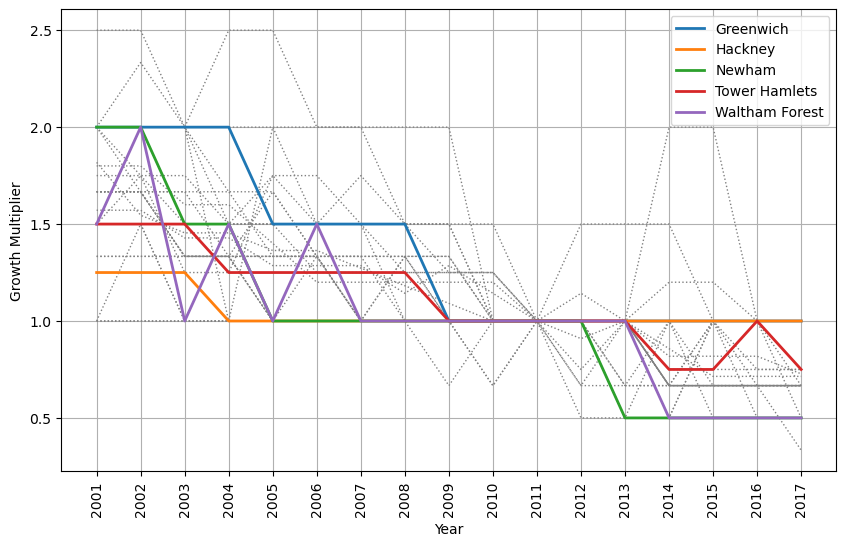

In [85]:
plot_all_boroughs(multipliers_sm_emp_2011)
plt.ylabel(GROWTH_MULTIPLIER)

plt.savefig(f'{PLOTS_DIR}/small_pubs_employees_multiplier_2011')
plt.show()

In [86]:
# Hacney specific
hackney_pubs_units = pubs_units_boroughs[pubs_units_boroughs['Area name'] == 'Hackney']
hackney_multipliers_2005 = multipliers_2005[multipliers_2005['Area name'] == 'Hackney']
hackney_multipliers_2011 = multipliers_2011[multipliers_2011['Area name'] == 'Hackney']
hackney_pubs_units = pubs_units_boroughs[pubs_units_boroughs['Area name'] == 'Hackney']
hackney_multipliers_emp_2005 = multipliers_emp_2005[multipliers_emp_2005['Area name'] == 'Hackney']
hackney_multipliers_emp_2011 = multipliers_emp_2011[multipliers_emp_2011['Area name'] == 'Hackney']
hackney_small_pubs = small_pubs_boroughs[small_pubs_boroughs['Area name'] == 'Hackney']
hackney_multipliers_sm_2005 = multipliers_sm_2005[multipliers_sm_2005['Area name'] == 'Hackney']
hackney_multipliers_sm_2011 = multipliers_sm_2011[multipliers_sm_2011['Area name'] == 'Hackney']
hackney_small_pubs_employees = small_pubs_employees_boroughs[small_pubs_employees_boroughs['Area name'] == 'Hackney']
hackney_multipliers_sm_emp_2005 = multipliers_sm_emp_2005[multipliers_sm_emp_2005['Area name'] == 'Hackney']
hackney_multipliers_sm_emp_2011 = multipliers_sm_emp_2011[multipliers_sm_emp_2011['Area name'] == 'Hackney']



In [87]:
gdp_per_capita = pd.read_excel(
    "../data/regionalgrossdomesticproductgdpcityregions.xlsx", sheet_name="Table 7")
# delete area type
gdp_per_capita.drop('Area type', axis=1, inplace=True)
# rename geo code to area code
gdp_per_capita.rename(columns={'Geo Code': 'Area code'}, inplace=True)


In [88]:
hackney_gdp_per_capita = gdp_per_capita[gdp_per_capita['Area name'] == 'Hackney']
hackney_gdp_per_capita.head()


,Area code,Area name,1998,1999,2000,2001,2002,2003,2004,2005,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
12,E09000012,Hackney,14461,15142,15997,16500,16869,17838,18543,19684,...,22750,23077,25215,25908,27154,28868,31750,36535,37284,44006


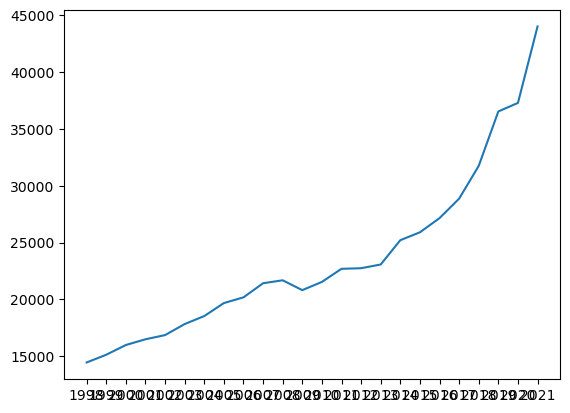

In [89]:
#plot hacnkey_gdp_per_capita
year_hackney = [str(y) for y in range(1998,2022)]
plt.plot(year_hackney, hackney_gdp_per_capita.iloc[0, 2:].values)

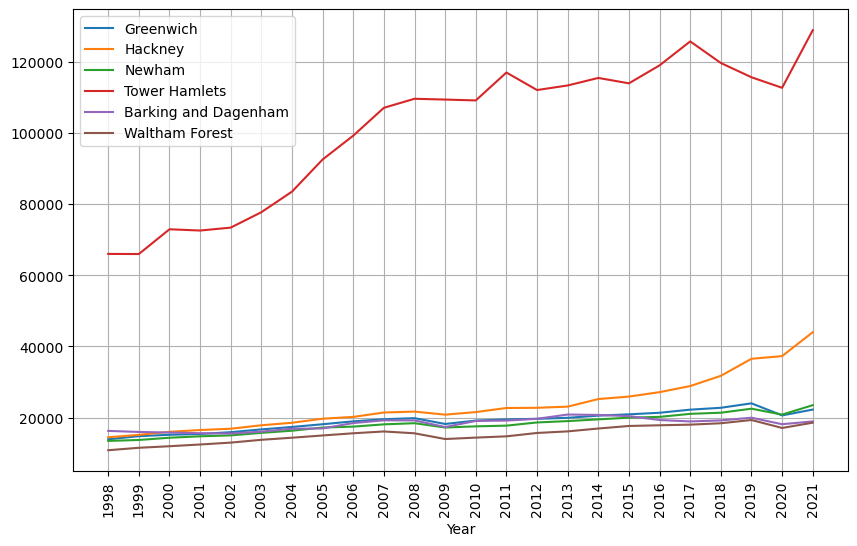

In [90]:
plot_boroughs_earlier(gdp_per_capita)


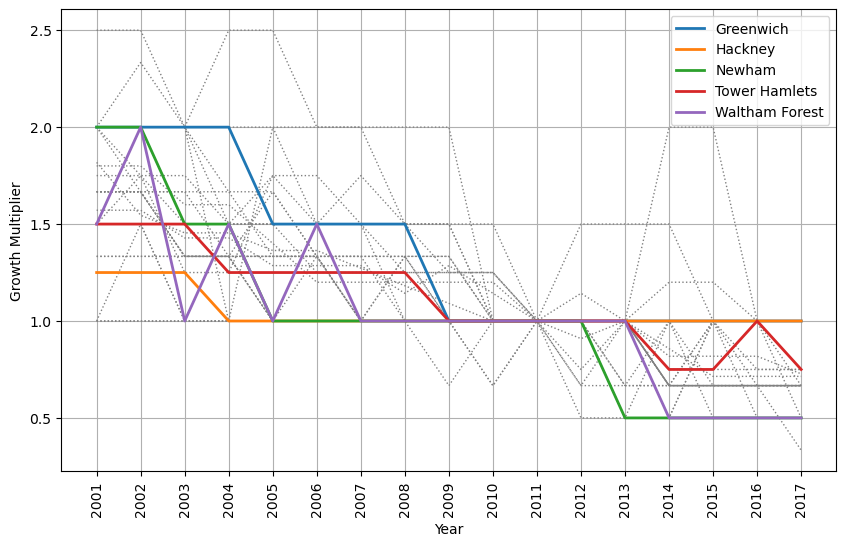

In [91]:
plot_all_boroughs(multipliers_sm_emp_2011)
plt.ylabel(GROWTH_MULTIPLIER)

plt.savefig(f'{PLOTS_DIR}/small_pubs_employees_multiplier_2011')
plt.show()

In [92]:
# Hacney specific
hackney_pubs_units = pubs_units_boroughs[pubs_units_boroughs['Area name'] == 'Hackney']
hackney_multipliers_2005 = multipliers_2005[multipliers_2005['Area name'] == 'Hackney']
hackney_multipliers_2011 = multipliers_2011[multipliers_2011['Area name'] == 'Hackney']
hackney_pubs_units = pubs_units_boroughs[pubs_units_boroughs['Area name'] == 'Hackney']
hackney_multipliers_emp_2005 = multipliers_emp_2005[multipliers_emp_2005['Area name'] == 'Hackney']
hackney_multipliers_emp_2011 = multipliers_emp_2011[multipliers_emp_2011['Area name'] == 'Hackney']
hackney_small_pubs = small_pubs_boroughs[small_pubs_boroughs['Area name'] == 'Hackney']
hackney_multipliers_sm_2005 = multipliers_sm_2005[multipliers_sm_2005['Area name'] == 'Hackney']
hackney_multipliers_sm_2011 = multipliers_sm_2011[multipliers_sm_2011['Area name'] == 'Hackney']
hackney_small_pubs_employees = small_pubs_employees_boroughs[small_pubs_employees_boroughs['Area name'] == 'Hackney']
hackney_multipliers_sm_emp_2005 = multipliers_sm_emp_2005[multipliers_sm_emp_2005['Area name'] == 'Hackney']
hackney_multipliers_sm_emp_2011 = multipliers_sm_emp_2011[multipliers_sm_emp_2011['Area name'] == 'Hackney']



In [93]:
gdp_per_capita = pd.read_excel(
    "../data/regionalgrossdomesticproductgdpcityregions.xlsx", sheet_name="Table 7")
# delete area type
gdp_per_capita.drop('Area type', axis=1, inplace=True)
# rename geo code to area code
gdp_per_capita.rename(columns={'Geo Code': 'Area code'}, inplace=True)


In [94]:
hackney_gdp_per_capita = gdp_per_capita[gdp_per_capita['Area name'] == 'Hackney']
hackney_gdp_per_capita.head()


,Area code,Area name,1998,1999,2000,2001,2002,2003,2004,2005,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
12,E09000012,Hackney,14461,15142,15997,16500,16869,17838,18543,19684,...,22750,23077,25215,25908,27154,28868,31750,36535,37284,44006


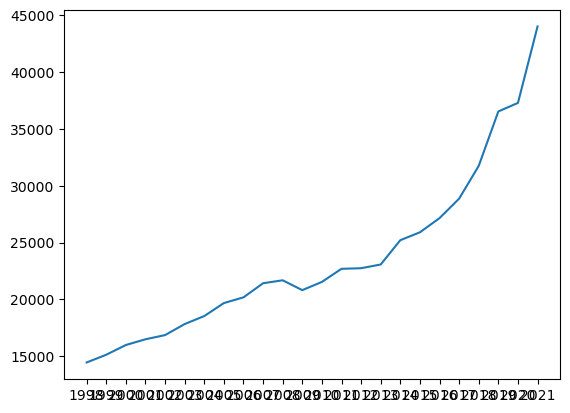

In [95]:
#plot hacnkey_gdp_per_capita
year_hackney = [str(y) for y in range(1998,2022)]
plt.plot(year_hackney, hackney_gdp_per_capita.iloc[0, 2:].values)

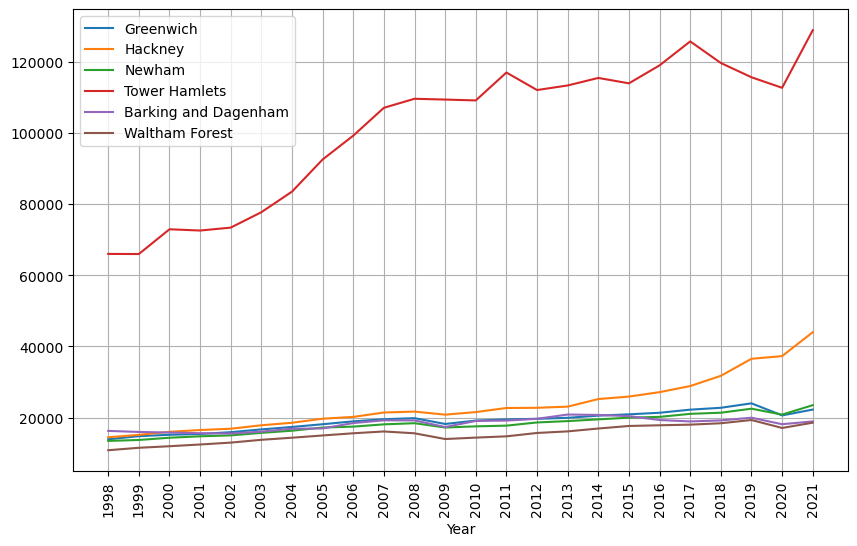

In [96]:
plot_boroughs_earlier(gdp_per_capita)


## Population (for per capita pubs)

In [97]:
population = pd.read_excel(
    "../data/regionalgrossdomesticproductgdpcityregions.xlsx", sheet_name="Table 8")
# delete area type
# population.drop('Area type', axis=1, inplace=True)
# rename geo code to area code
# population.rename(columns={'Geo Code': 'Area code'}, inplace=True)
population.head()

,"Table 8: City Regions: Whole economy GVA implied deflators, 2019 equals 100 [note 1,2]",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26
0,Area type,Geo code,Area name,1998.0,1999.0,2000.0,2001.0,2002.0,2003.0,2004.0,...,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0,2019,2020.0,2021.0
1,CR,E61000001,Greater London Authority,66.9,67.8,67.8,69.5,71.2,72.6,74.1,...,87.5,89.4,91.4,93.3,94.9,96.4,97.9,100,107.0,105.9
2,LA,E09000001,City of London,64.5,65.4,64.7,65.0,65.3,67.3,71.4,...,87.9,92.2,94.5,94.8,96.3,97.2,97.7,100,102.9,104.2
3,LA,E09000002,Barking and Dagenham,66.3,66.5,67.3,66.9,69.3,70.5,71.3,...,83.7,87.1,87.1,88.9,93.2,94.8,96.8,100,107.0,105.8
4,LA,E09000003,Barnet,61.5,63.1,64.4,66.4,68.5,70.2,71.6,...,86.6,88.2,90.9,93.4,95.4,96.6,98.6,100,107.2,104.7


In [98]:
#drop header and make first row the header
population.columns = population.iloc[0]
population = population[1:]
population.head()


,Area type,Geo code,Area name,1998.0,1999.0,2000.0,2001.0,2002.0,2003.0,2004.0,...,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0,2019,2020.0,2021.0
1,CR,E61000001,Greater London Authority,66.9,67.8,67.8,69.5,71.2,72.6,74.1,...,87.5,89.4,91.4,93.3,94.9,96.4,97.9,100,107.0,105.9
2,LA,E09000001,City of London,64.5,65.4,64.7,65.0,65.3,67.3,71.4,...,87.9,92.2,94.5,94.8,96.3,97.2,97.7,100,102.9,104.2
3,LA,E09000002,Barking and Dagenham,66.3,66.5,67.3,66.9,69.3,70.5,71.3,...,83.7,87.1,87.1,88.9,93.2,94.8,96.8,100,107.0,105.8
4,LA,E09000003,Barnet,61.5,63.1,64.4,66.4,68.5,70.2,71.6,...,86.6,88.2,90.9,93.4,95.4,96.6,98.6,100,107.2,104.7
5,LA,E09000004,Bexley,63.8,64.3,64.9,66.0,68.0,69.2,70.8,...,88.2,89.8,92.3,94.0,94.9,96.8,98.3,100,102.6,100.6


In [99]:
population.drop(['Geo code', 'Area type'], inplace = True, axis=1)
population.head()


,Area name,1998.0,1999.0,2000.0,2001.0,2002.0,2003.0,2004.0,2005.0,2006.0,...,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0,2019,2020.0,2021.0
1,Greater London Authority,66.9,67.8,67.8,69.5,71.2,72.6,74.1,75.9,77.7,...,87.5,89.4,91.4,93.3,94.9,96.4,97.9,100,107.0,105.9
2,City of London,64.5,65.4,64.7,65.0,65.3,67.3,71.4,73.0,78.0,...,87.9,92.2,94.5,94.8,96.3,97.2,97.7,100,102.9,104.2
3,Barking and Dagenham,66.3,66.5,67.3,66.9,69.3,70.5,71.3,73.1,73.5,...,83.7,87.1,87.1,88.9,93.2,94.8,96.8,100,107.0,105.8
4,Barnet,61.5,63.1,64.4,66.4,68.5,70.2,71.6,74.1,75.7,...,86.6,88.2,90.9,93.4,95.4,96.6,98.6,100,107.2,104.7
5,Bexley,63.8,64.3,64.9,66.0,68.0,69.2,70.8,73.7,75.9,...,88.2,89.8,92.3,94.0,94.9,96.8,98.3,100,102.6,100.6


In [100]:
population

,Area name,1998.0,1999.0,2000.0,2001.0,2002.0,2003.0,2004.0,2005.0,2006.0,...,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0,2019,2020.0,2021.0
1,Greater London Authority,66.9,67.8,67.8,69.5,71.2,72.6,74.1,75.9,77.7,...,87.5,89.4,91.4,93.3,94.9,96.4,97.9,100,107.0,105.9
2,City of London,64.5,65.4,64.7,65.0,65.3,67.3,71.4,73.0,78.0,...,87.9,92.2,94.5,94.8,96.3,97.2,97.7,100,102.9,104.2
3,Barking and Dagenham,66.3,66.5,67.3,66.9,69.3,70.5,71.3,73.1,73.5,...,83.7,87.1,87.1,88.9,93.2,94.8,96.8,100,107.0,105.8
4,Barnet,61.5,63.1,64.4,66.4,68.5,70.2,71.6,74.1,75.7,...,86.6,88.2,90.9,93.4,95.4,96.6,98.6,100,107.2,104.7
5,Bexley,63.8,64.3,64.9,66.0,68.0,69.2,70.8,73.7,75.9,...,88.2,89.8,92.3,94.0,94.9,96.8,98.3,100,102.6,100.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,"Armagh City, Banbridge and Craigavon",65.0,65.2,65.7,67.0,69.2,71.5,73.2,74.7,76.8,...,88.5,90.2,90.5,92.7,94.0,96.0,97.9,100,108.9,107.7
189,Mid Ulster,65.6,65.4,65.7,66.9,68.8,71.4,72.5,74.0,75.3,...,86.6,89.1,89.4,92.6,93.5,95.7,97.7,100,103.8,103.2
190,Fermanagh and Omagh,69.5,69.1,68.8,70.2,72.3,75.2,77.5,78.8,82.2,...,90.6,92.4,92.5,94.0,94.8,96.3,98.0,100,108.4,107.3
191,Causeway Coast and Glens Growth Deal,65.7,65.4,66.0,67.4,69.2,72.3,74.0,74.8,76.7,...,87.3,88.6,89.0,91.4,93.1,94.8,97.4,100,108.1,107.6


In [101]:
#keep only london boroughs
growth_boroughs = ['Greenwich', 'Hackney', 'Newham', 'Tower Hamlets',
                   'Barking and Dagenham', 'Waltham Forest']

boroughs = ['City of London', 'Barking and Dagenham', 'Barnet', 'Bexley',
       'Brent', 'Bromley', 'Camden', 'Croydon', 'Ealing', 'Enfield',
       'Greenwich', 'Hackney', 'Hammersmith and Fulham', 'Haringey',
       'Harrow', 'Havering', 'Hillingdon', 'Hounslow', 'Islington',
       'Kensington and Chelsea', 'Kingston-upon-Thames', 'Lambeth',
       'Lewisham', 'Merton', 'Newham', 'Redbridge',
       'Richmond-upon-Thames', 'Southwark', 'Sutton', 'Tower Hamlets',
       'Waltham Forest', 'Wandsworth', 'Westminster']
total_boroughs = growth_boroughs + boroughs

print(population['Area name'])

1                  Greater London Authority
2                            City of London
3                      Barking and Dagenham
4                                    Barnet
5                                    Bexley
                       ...                 
188    Armagh City, Banbridge and Craigavon
189                              Mid Ulster
190                     Fermanagh and Omagh
191    Causeway Coast and Glens Growth Deal
192                Causeway Coast and Glens
Name: Area name, Length: 192, dtype: object


In [102]:
#keep only london boroughs
population = population[population['Area name'].isin(total_boroughs)]
population.head()

,Area name,1998.0,1999.0,2000.0,2001.0,2002.0,2003.0,2004.0,2005.0,2006.0,...,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0,2019,2020.0,2021.0
2,City of London,64.5,65.4,64.7,65.0,65.3,67.3,71.4,73.0,78.0,...,87.9,92.2,94.5,94.8,96.3,97.2,97.7,100,102.9,104.2
3,Barking and Dagenham,66.3,66.5,67.3,66.9,69.3,70.5,71.3,73.1,73.5,...,83.7,87.1,87.1,88.9,93.2,94.8,96.8,100,107.0,105.8
4,Barnet,61.5,63.1,64.4,66.4,68.5,70.2,71.6,74.1,75.7,...,86.6,88.2,90.9,93.4,95.4,96.6,98.6,100,107.2,104.7
5,Bexley,63.8,64.3,64.9,66.0,68.0,69.2,70.8,73.7,75.9,...,88.2,89.8,92.3,94.0,94.9,96.8,98.3,100,102.6,100.6
6,Brent,64.0,65.4,65.9,68.3,70.1,71.4,72.4,74.2,75.0,...,85.4,86.8,88.7,91.7,93.6,95.4,97.7,100,108.1,105.6


In [103]:
#drop population columns from 1998 to 2000 included
population.drop(population.columns[1:4], axis=1, inplace=True)
population.head()

/var/folders/d3/ry6v0r7j28d4wdqwrz_hvdqc0000gn/T/ipykernel_81606/819006133.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  population.drop(population.columns[1:4], axis=1, inplace=True)


,Area name,2001.0,2002.0,2003.0,2004.0,2005.0,2006.0,2007.0,2008.0,2009.0,...,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0,2019,2020.0,2021.0
2,City of London,65.0,65.3,67.3,71.4,73.0,78.0,74.5,73.6,84.2,...,87.9,92.2,94.5,94.8,96.3,97.2,97.7,100,102.9,104.2
3,Barking and Dagenham,66.9,69.3,70.5,71.3,73.1,73.5,75.0,76.0,79.2,...,83.7,87.1,87.1,88.9,93.2,94.8,96.8,100,107.0,105.8
4,Barnet,66.4,68.5,70.2,71.6,74.1,75.7,78.9,83.3,84.3,...,86.6,88.2,90.9,93.4,95.4,96.6,98.6,100,107.2,104.7
5,Bexley,66.0,68.0,69.2,70.8,73.7,75.9,78.8,83.0,84.8,...,88.2,89.8,92.3,94.0,94.9,96.8,98.3,100,102.6,100.6
6,Brent,68.3,70.1,71.4,72.4,74.2,75.0,78.0,81.6,82.8,...,85.4,86.8,88.7,91.7,93.6,95.4,97.7,100,108.1,105.6


In [104]:
# convert years to float
population.iloc[:, 1:] = population.iloc[:, 1:].astype(float)
population.head()

/var/folders/d3/ry6v0r7j28d4wdqwrz_hvdqc0000gn/T/ipykernel_81606/3489953059.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  population.iloc[:, 1:] = population.iloc[:, 1:].astype(float)


,Area name,2001.0,2002.0,2003.0,2004.0,2005.0,2006.0,2007.0,2008.0,2009.0,...,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0,2019,2020.0,2021.0
2,City of London,65.0,65.3,67.3,71.4,73.0,78.0,74.5,73.6,84.2,...,87.9,92.2,94.5,94.8,96.3,97.2,97.7,100.0,102.9,104.2
3,Barking and Dagenham,66.9,69.3,70.5,71.3,73.1,73.5,75.0,76.0,79.2,...,83.7,87.1,87.1,88.9,93.2,94.8,96.8,100.0,107.0,105.8
4,Barnet,66.4,68.5,70.2,71.6,74.1,75.7,78.9,83.3,84.3,...,86.6,88.2,90.9,93.4,95.4,96.6,98.6,100.0,107.2,104.7
5,Bexley,66.0,68.0,69.2,70.8,73.7,75.9,78.8,83.0,84.8,...,88.2,89.8,92.3,94.0,94.9,96.8,98.3,100.0,102.6,100.6
6,Brent,68.3,70.1,71.4,72.4,74.2,75.0,78.0,81.6,82.8,...,85.4,86.8,88.7,91.7,93.6,95.4,97.7,100.0,108.1,105.6


In [105]:
# remove years 2018 - 2021
population.drop(population.columns[-4:], axis=1, inplace=True)
#save to csv
population.to_csv('../data/population.csv', index=False)
population.head()

/var/folders/d3/ry6v0r7j28d4wdqwrz_hvdqc0000gn/T/ipykernel_81606/1387606824.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  population.drop(population.columns[-4:], axis=1, inplace=True)


,Area name,2001.0,2002.0,2003.0,2004.0,2005.0,2006.0,2007.0,2008.0,2009.0,2010.0,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0
2,City of London,65.0,65.3,67.3,71.4,73.0,78.0,74.5,73.6,84.2,86.9,88.8,87.9,92.2,94.5,94.8,96.3,97.2
3,Barking and Dagenham,66.9,69.3,70.5,71.3,73.1,73.5,75.0,76.0,79.2,81.8,80.7,83.7,87.1,87.1,88.9,93.2,94.8
4,Barnet,66.4,68.5,70.2,71.6,74.1,75.7,78.9,83.3,84.3,83.3,84.4,86.6,88.2,90.9,93.4,95.4,96.6
5,Bexley,66.0,68.0,69.2,70.8,73.7,75.9,78.8,83.0,84.8,83.4,85.2,88.2,89.8,92.3,94.0,94.9,96.8
6,Brent,68.3,70.1,71.4,72.4,74.2,75.0,78.0,81.6,82.8,82.5,83.5,85.4,86.8,88.7,91.7,93.6,95.4


In [106]:
# get pubs per capita
pubs_per_capita = pd.read_excel("../data/pubs-borough-msoa.xls", sheet_name="Pubs units", skiprows=4, names=columns)
pubs_per_capita.head()
#drop London total
pubs_per_capita = pubs_per_capita[pubs_per_capita['Area name'] != 'London']

In [107]:
pubs_per_capita = pubs_per_capita[pubs_per_capita['Area name'].isin(total_boroughs)]

In [108]:
pubs_per_capita

,Area code,Area name,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
1,E09000001,City of London,200.0,195.0,180.0,180.0,200.0,185.0,200.0,195.0,185.0,190.0,175.0,165.0,155.0,160.0,150.0,150.0,160.0
2,E09000002,Barking and Dagenham,45.0,40.0,45.0,40.0,40.0,40.0,30.0,30.0,25.0,25.0,25.0,30.0,20.0,20.0,25.0,20.0,20.0
3,E09000003,Barnet,135.0,135.0,130.0,120.0,125.0,120.0,115.0,120.0,110.0,95.0,95.0,95.0,85.0,90.0,95.0,100.0,80.0
4,E09000004,Bexley,95.0,95.0,95.0,100.0,105.0,105.0,105.0,105.0,90.0,95.0,95.0,95.0,95.0,85.0,90.0,90.0,95.0
5,E09000005,Brent,120.0,115.0,105.0,105.0,105.0,100.0,95.0,100.0,95.0,90.0,95.0,90.0,85.0,75.0,85.0,75.0,70.0
6,E09000006,Bromley,130.0,135.0,130.0,120.0,125.0,120.0,120.0,125.0,125.0,115.0,105.0,105.0,100.0,100.0,110.0,100.0,95.0
7,E09000007,Camden,295.0,290.0,280.0,270.0,270.0,265.0,270.0,260.0,275.0,265.0,255.0,265.0,245.0,235.0,225.0,225.0,235.0
8,E09000008,Croydon,165.0,180.0,160.0,155.0,150.0,130.0,125.0,130.0,115.0,105.0,105.0,100.0,95.0,90.0,95.0,90.0,85.0
9,E09000009,Ealing,145.0,150.0,135.0,125.0,120.0,120.0,120.0,115.0,105.0,95.0,100.0,100.0,100.0,100.0,115.0,100.0,95.0
10,E09000010,Enfield,120.0,125.0,105.0,100.0,100.0,100.0,95.0,95.0,90.0,90.0,90.0,85.0,75.0,80.0,80.0,75.0,65.0


In [109]:
# convert years to float
pubs_per_capita.iloc[:, 2:] = pubs_per_capita.iloc[:, 2:].astype(float)

pubs_per_capita.head()

,Area code,Area name,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
1,E09000001,City of London,200.0,195.0,180.0,180.0,200.0,185.0,200.0,195.0,185.0,190.0,175.0,165.0,155.0,160.0,150.0,150.0,160.0
2,E09000002,Barking and Dagenham,45.0,40.0,45.0,40.0,40.0,40.0,30.0,30.0,25.0,25.0,25.0,30.0,20.0,20.0,25.0,20.0,20.0
3,E09000003,Barnet,135.0,135.0,130.0,120.0,125.0,120.0,115.0,120.0,110.0,95.0,95.0,95.0,85.0,90.0,95.0,100.0,80.0
4,E09000004,Bexley,95.0,95.0,95.0,100.0,105.0,105.0,105.0,105.0,90.0,95.0,95.0,95.0,95.0,85.0,90.0,90.0,95.0
5,E09000005,Brent,120.0,115.0,105.0,105.0,105.0,100.0,95.0,100.0,95.0,90.0,95.0,90.0,85.0,75.0,85.0,75.0,70.0


In [110]:
# divide pubs by population
pubs_per_capita.iloc[:, 2:] = pubs_per_capita.iloc[:, 2:].div(population.iloc[:, 1:].values)
pubs_per_capita.head()

,Area code,Area name,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
1,E09000001,City of London,3.076923,2.986217,2.674591,2.521008,2.739726,2.371795,2.684564,2.649457,2.197150,2.186421,1.970721,1.877133,1.681128,1.693122,1.582278,1.557632,1.646091
2,E09000002,Barking and Dagenham,0.672646,0.577201,0.638298,0.561010,0.547196,0.544218,0.400000,0.394737,0.315657,0.305623,0.309789,0.358423,0.229621,0.229621,0.281215,0.214592,0.210970
3,E09000003,Barnet,2.033133,1.970803,1.851852,1.675978,1.686910,1.585205,1.457541,1.440576,1.304864,1.140456,1.125592,1.096998,0.963719,0.990099,1.017131,1.048218,0.828157
4,E09000004,Bexley,1.439394,1.397059,1.372832,1.412429,1.424695,1.383399,1.332487,1.265060,1.061321,1.139089,1.115023,1.077098,1.057906,0.920910,0.957447,0.948367,0.981405
5,E09000005,Brent,1.756955,1.640514,1.470588,1.450276,1.415094,1.333333,1.217949,1.225490,1.147343,1.090909,1.137725,1.053864,0.979263,0.845547,0.926936,0.801282,0.733753


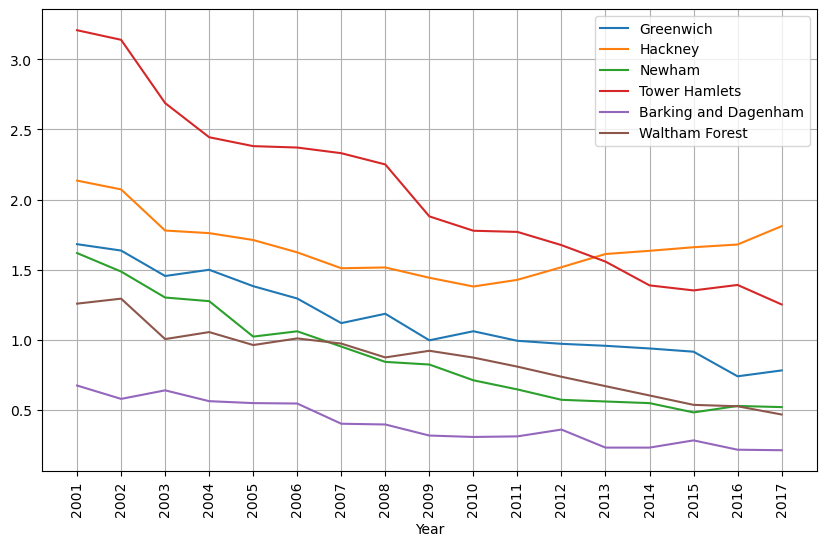

In [111]:
# plot pubs per capita
plot_boroughs(pubs_per_capita)


In [112]:
from scipy.stats import ttest_ind
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import adfuller

from pmdarima import auto_arima